In [163]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import torch
from transformers import BertTokenizer, BertModel
from torch.nn.parallel import DataParallel
import seaborn as sns

- this function takes array input & model specific parameters and ouputs nx1024 encodings where n is no of documents in corpus


In [164]:
def encode_text(txt_array, model_name, max_seq_length):
    
    #it tokenize bert for specific [CLS] and [SEP] token
    tokenizer = BertTokenizer.from_pretrained(model_name)
    
    model = BertModel.from_pretrained(model_name)
    #inililised an array
    encoded_texts = []
    
    #hardware accelerator based on architecture
    if torch.cuda.is_available():
        device = torch.device("cuda")
        print("using cuda because is available")
    else:
        try:
            device=torch.device("mps")
            print("using mps because is available on mac")
        except:
            device=torch.device("cpu")
            print("so sorry using cpu")
    
    model = model.to(device)
    #model parallel is for parallel computation
    model_parallel = DataParallel(model)
    
    i=0
    for text in txt_array:
        tokens = tokenizer.encode(text, add_special_tokens=True, truncation=True, max_length=max_seq_length)
        input_ids = torch.tensor([tokens]).to(device)
        with torch.no_grad():
            outputs = model_parallel(input_ids)
            last_layer_hidden_states = outputs.last_hidden_state
        # this performs mean pooling of last layers for entire sentence structure
        pooled_output= torch.mean(last_layer_hidden_states, dim=1)
        encoded_texts.append(pooled_output)
        print(i,"th step completed")
        i+=1
    encoded_texts = torch.cat(encoded_texts, dim=0)
    
    return encoded_texts

In [165]:
model_name = 'bert-large-uncased'
max_seq_length = 512

In [166]:
arr=["Karan and Arjan are Brothers","Arjan and Karan are Brothers"]

In [167]:
encoding_out=encode_text(arr, model_name, max_seq_length)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


using mps because is available on mac
0 th step completed
1 th step completed


In [168]:
encoding_out

tensor([[-0.2435, -0.0460, -0.1495,  ..., -0.0140,  0.1298,  0.0557],
        [-0.3279, -0.0576, -0.1604,  ..., -0.0027,  0.1291,  0.0799]],
       device='mps:0')

In [169]:
encoding_out.shape

torch.Size([2, 1024])

In [170]:
correlation_matrix=np.corrcoef(encoding_out.cpu())

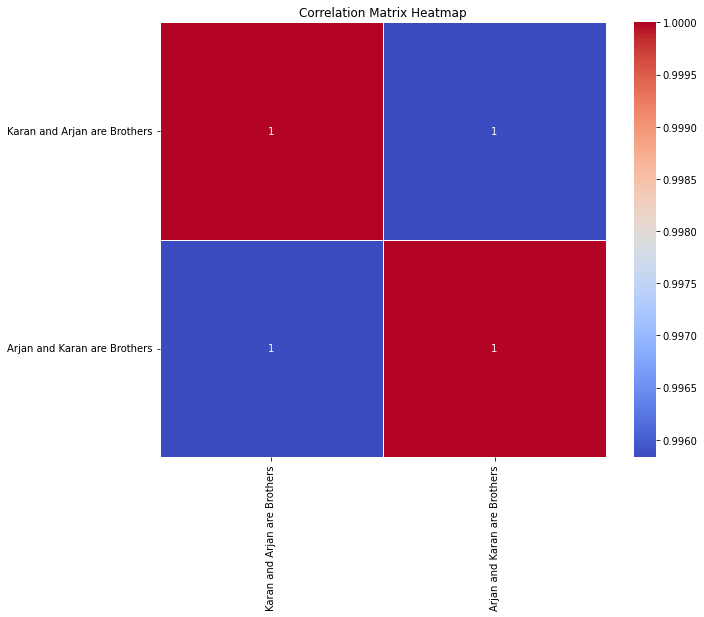

In [171]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.xticks(np.arange(len(arr)) + 0.5, arr, rotation=90)
plt.yticks(np.arange(len(arr)) + 0.5, arr, rotation=0)

plt.title('Correlation Matrix Heatmap')
plt.show()


# Funny example 🤣
- you look perfect tonight- Ed Sheran
- even moon will blush after watching your beauty -Diljit Dosanjh
- Diljit Bhajji rocks 💪

In [186]:
# credits ed shreen Perfect,Diljit luna
funny=["you look perfect tonight","even moon will blush after watching your beauty"]

In [187]:
encoding_out_fun=encode_text(funny, model_name, max_seq_length)

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


using mps because is available on mac
0 th step completed
1 th step completed


In [188]:
encoding_out_fun

tensor([[-0.5261,  0.0696, -0.9669,  ...,  0.0357,  0.3972,  0.6767],
        [-0.4741,  0.5278, -1.1327,  ..., -0.3532, -0.2984,  0.7804]],
       device='mps:0')

In [189]:
correlation_matrix_2=np.corrcoef(encoding_out_fun.cpu())

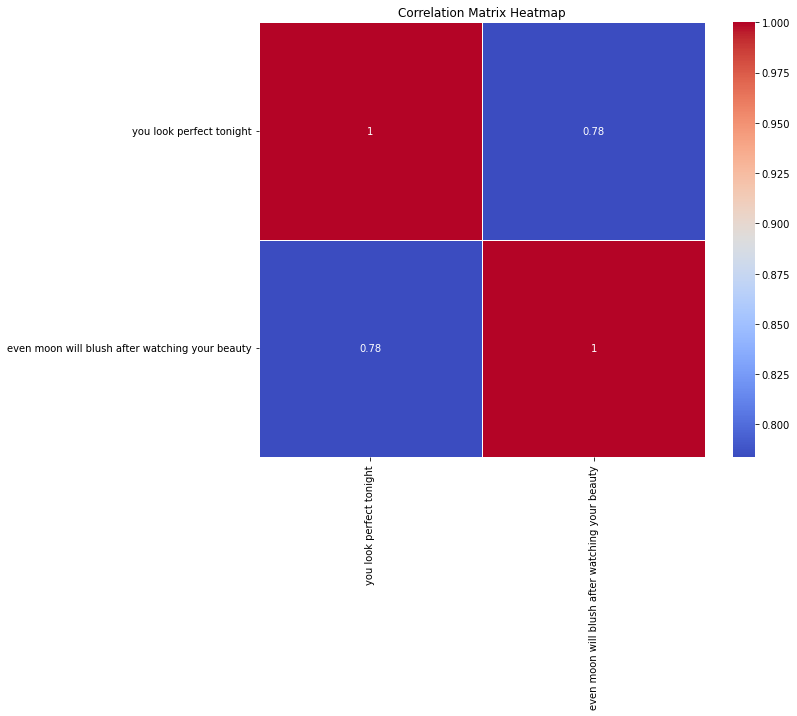

In [190]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_2, annot=True, cmap='coolwarm', linewidths=.5)
plt.xticks(np.arange(len(funny)) + 0.5, funny, rotation=90)
plt.yticks(np.arange(len(funny)) + 0.5, funny, rotation=0)

plt.title('Correlation Matrix Heatmap')
plt.show()
